 ## EELT 7023 - Tópicos Especiais em Identificação de Sistemas

#### Aluno: Rafael Luiz B. Stonoga

### $$\textbf{Exercício 2}$$

$\textbf{Problema 02:}$ Avaliar o efeito de polarização na estimativa do valor de um resistor. Considere:

- $i_0$, $v_0$ e $R_0$ correspondem a valores reais de corrente, tensão e resistência;
- $i$ e $v$ correspondem a valores medidos de corrente e tensão;
- $R_0 = 1000\Omega$ ;
- $v_0 (t)= R_0\cdot i_0(t)$, $t = 1, 2, \dots, N=100$;
- $i_0$ uniformemente distribuída em $[-i_{max}, i_{max}]$, com $i_{max} = 0.01 A$;
- $i(t) = i_0(t) + n_i(t)$, onde $n_i(t)\sim N(0,\sigma_i^2)$;
- Considerar três valores para $\sigma_i:0, 0.5\cdot10^{-3}$ e $1\cdot10^{-3}$;
- $v(t) = v_0(t) + n_v(t)$, onde $n_v(t)\sim N(0,\sigma_v^2)$, com $\sigma_v^2 = 1$;


$\textbf{Objetivo:}$ Minimizar $10^5$ vezes a função quadrática $J(R)$:
$$J(R) = \frac{1}{N} \sum^{N}_{t=1} \left(v(t) - R\cdot i(t)\right)^2$$

e para cada uma delas utilizar uma geração diferente de ruídos $n_i(t)$ e $n_v(t)$.

Para cada valor de $\sigma_i$, apresentar um histograma considerando todos os valores obtidos para $\hat{R}$, onde $\hat{R}$ denota o argumento que minimiza a função objetivo.

$\textbf{Dica}:$ O valor $R = \hat{R}$ que minimiza $J(R)$ é dado por
$$\hat{R} = \frac{\sum^{N}_{t=1} v(t)i(t)}{\sum^{N}_{t=1}i^2(t)}$$

$\textbf{Resolução:}$ Primeiramente definiu-se a função que calcula a estimativa de $\hat{R}$. Cada vez que essa função é chamada ela inicializa os ruídos com valores distintos.

In [22]:
# Essa biblioteca é necessária para utilizar distribuições normais
using Distributions

In [23]:
function estima_resistencia(sigma_i, N=100)
    # N é o número de pontos de medição utilizados nos cálculos. É igual a 100 por padrão
    i_max = 0.01;
    R0 = 1000;
    
    # Dados reais
    i0 = (rand(Float64, N) .- 0.5) * 2 * i_max;
    v0 = R0 * i0;
    
    # Dados medidos
    i = i0 + rand(Distributions.Normal(0, sigma_i), N);
    v = v0 + rand(Distributions.Normal(0, 1), N);
    
    return (v' * i) / (i' * i)
end

estima_resistencia (generic function with 2 methods)

Em seguida essa função foi executada $10^5$ vezes para cada valor desejado de $\sigma_i$.

In [24]:
# Biblioteca de DataFrames utilizada para organizar melhor os resultados
using DataFrames

In [25]:
iter_total = 100;
results = DataFrame(sigma_0 = zeros(iter_total), sigma_0_5mA = zeros(iter_total), sigma_1mA = zeros(iter_total))

for i = 1:iter_total
    results[i, :sigma_0]  = estima_resistencia(0);
    results[i, :sigma_0_5mA]  = estima_resistencia(0.5e-3);
    results[i, :sigma_1mA]  = estima_resistencia(1e-3);
end

As principais estatísticas dos resultados para cada valor de $\sigma_i$ constam na tabela a seguir:

In [26]:
describe(results, :min, :mean, :max, :std)

,variable,min,mean,max,std
,Symbol,Float64,Float64,Float64,Float64
1,sigma_0,940.834,999.269,1044.93,16.2444
2,sigma_0_5mA,951.194,993.795,1040.3,18.788
3,sigma_1mA,904.95,968.05,1043.37,24.5302


É possível notar que há um desvio do valor médio das estimativas em relação ao valor esperado de $1000\Omega$ para os casos em que $\sigma_i\neq0$. Também se observa que, quanto maior o valor de $\sigma_i$, maior o desvio do valor médio das estimativas.

In [27]:
# Biblioteca necessária para plotar gráficos
using Plots
pyplot();
# Biblioteca utilizada para plots de densidade de probabilidade
using StatsPlots
using LaTeXStrings

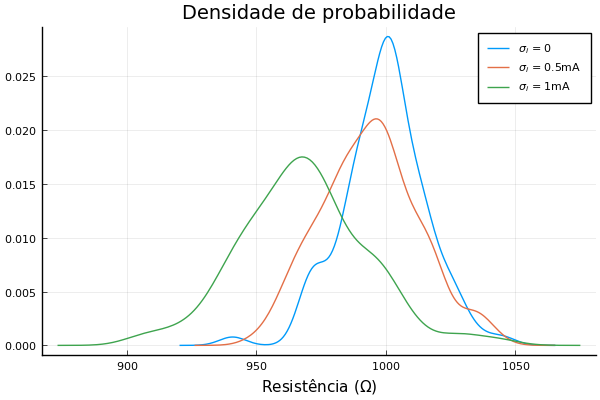

In [28]:
@df results density([:sigma_0, :sigma_0_5mA, :sigma_1mA], 
    title="Densidade de probabilidade", 
    label=["$(L"\sigma_i") = 0" "$(L"\sigma_i") = 0.5mA" "$(L"\sigma_i") = 1mA"],
    xlabel = "Resistência ($(L"\Omega"))"
)

É possível notar que quando não há ruído na variável de entrada ($\sigma_i = 0$) a curva de densidade de probabilidade fica aproximadamente centrada no valor esperado de resistência, ao passo que na presença de ruído ocorre não apenas um desvio no valor médio das estimativas, mas também um aumento da sua dispersão.

Isso pode ser confirmado pelos valores obtidos na tabela anterior. Quanto maior o ruído (ou quanto maior $\sigma_i$) maior o desvio médio das estimativas em relação ao valor correto. Da mesma forma, quanto maior a dispersão do ruído na entrada, maior a dispersão das estimativas, o que é representado pelo aumento do seu desvio padrão.